# Data Understanding and Preparation

## Initial Data Exploration
First, we will load the dataset and perform an initial exploration to understand the structure, identify missing values, and summarize the data types and basic statistics.

### Load the Dataset
We begin by importing necessary libraries and loading the data from the CSV file into a DataFrame.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/Users/mthooyavan/Desktop/Lead Scoring Assignment/Leads.csv')

# Display the first few rows of the dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Initial Data Check
Here, we will check the basic information about the dataset, including the number of entries, data types of the columns, and the presence of missing values.

In [2]:
# Check dataframe information including data types and missing values
df.info()

# Check for the number of missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Data Cleaning
Given that we have identified missing values and checked for data types, the next step is to handle these issues appropriately.

### Drop Unnecessary Columns
We will drop columns that are not needed for the analysis or contain redundant information.

In [3]:
# Drop columns that do not make sense to be used in the model
cols_to_drop = ['Prospect ID', 'Lead Number',]
df = df.drop(cols_to_drop, axis=1)

### Dropping or Imputing Missing Values
Based on the percentage of missing values and the importance of the columns, decide whether to drop the column or impute values.

In [4]:
# Impute missing values in 'TotalVisits' with the median
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)

# Example: Drop columns with more than 30% missing values
for column in df.columns:
    if df[column].isnull().mean() > 0.30:
        df.drop(column, axis=1, inplace=True)

/var/folders/5d/phgmwl4n4r31tkv77xqrd3_c0000gp/T/ipykernel_38602/2020395599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)


## Summary of Data Cleaning
Finally, we'll summarize the changes made to the dataset, ensuring that it is now ready for further analysis and model building.

In [5]:
# Final check of the cleaned data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


# Exploratory Data Analysis (EDA)

## Univariate Analysis
First, we'll examine the distribution of individual variables, focusing on the target variable 'Converted' to understand the proportion of converted leads versus non-converted leads.

### Distribution of the Target Variable

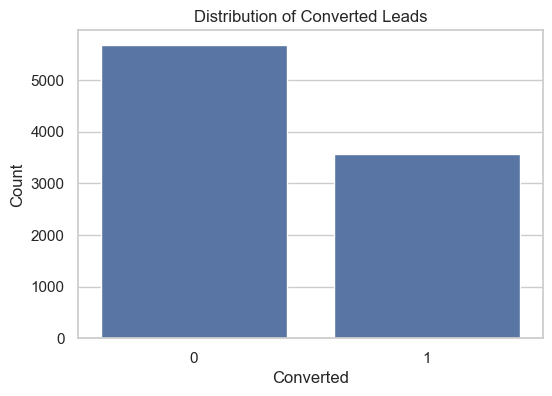

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'Converted' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted Leads')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis
Next, we explore the relationship between the target variable and predictor variables. This helps identify which features are most indicative of a lead converting.

### Relationship between Lead Origin and Conversion

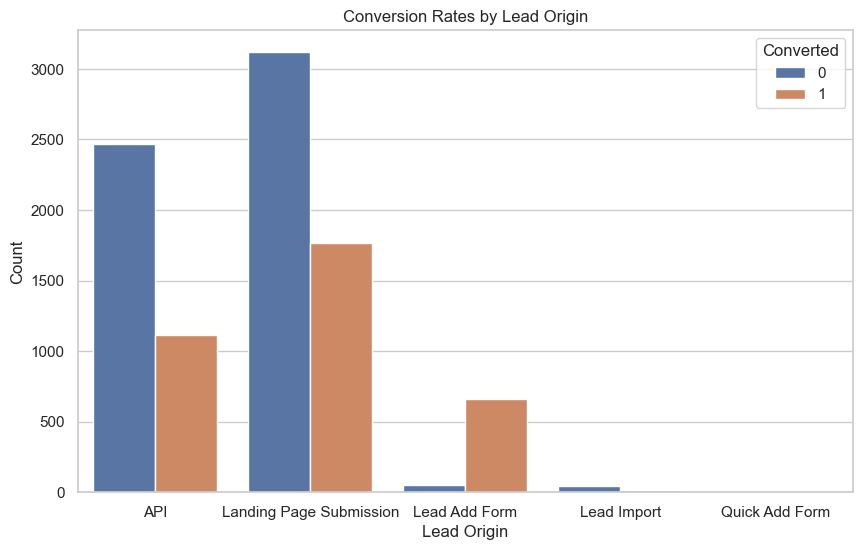

In [7]:
# Comparing the conversion rate across different lead origins
plt.figure(figsize=(10, 6))
sns.countplot(x='Lead Origin', hue='Converted', data=df)
plt.title('Conversion Rates by Lead Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')
plt.show()

### Relationship between Lead Source and Conversion

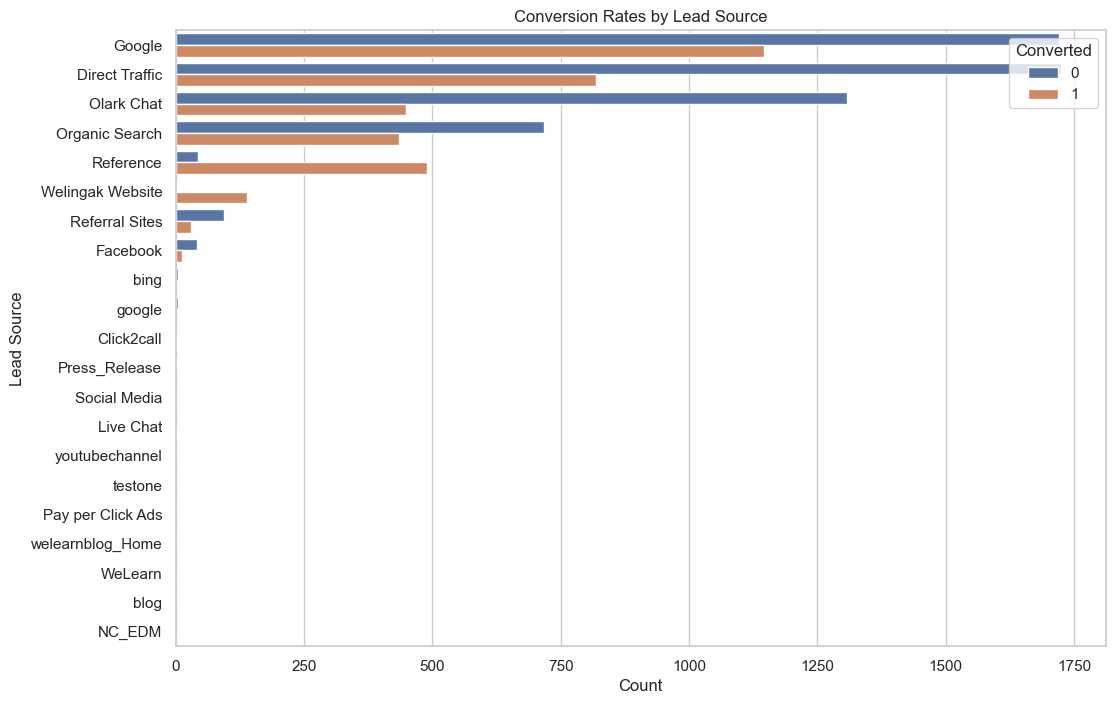

In [8]:
# Plotting the conversion rate by lead sources
plt.figure(figsize=(12, 8))
sns.countplot(y='Lead Source', hue='Converted', data=df, order = df['Lead Source'].value_counts().index)
plt.title('Conversion Rates by Lead Source')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.legend(title='Converted', loc='upper right')
plt.show()

# The visualizations reveal significant insights:
- The 'Lead Source' and 'Lead Origin' features are highly indicative of a lead converting.
- The 'Lead Source' feature has a significant impact on the conversion rate, with 'Google' and 'Direct Traffic' having the highest conversion rates.
- The 'Lead Origin' feature also plays a crucial role in determining the conversion rate, with 'API' and 'Landing Page Submission' having the highest conversion rates.

## Multivariate Analysis
To further explore the data, we consider interactions between multiple variables.

### Heatmap of Numerical Features

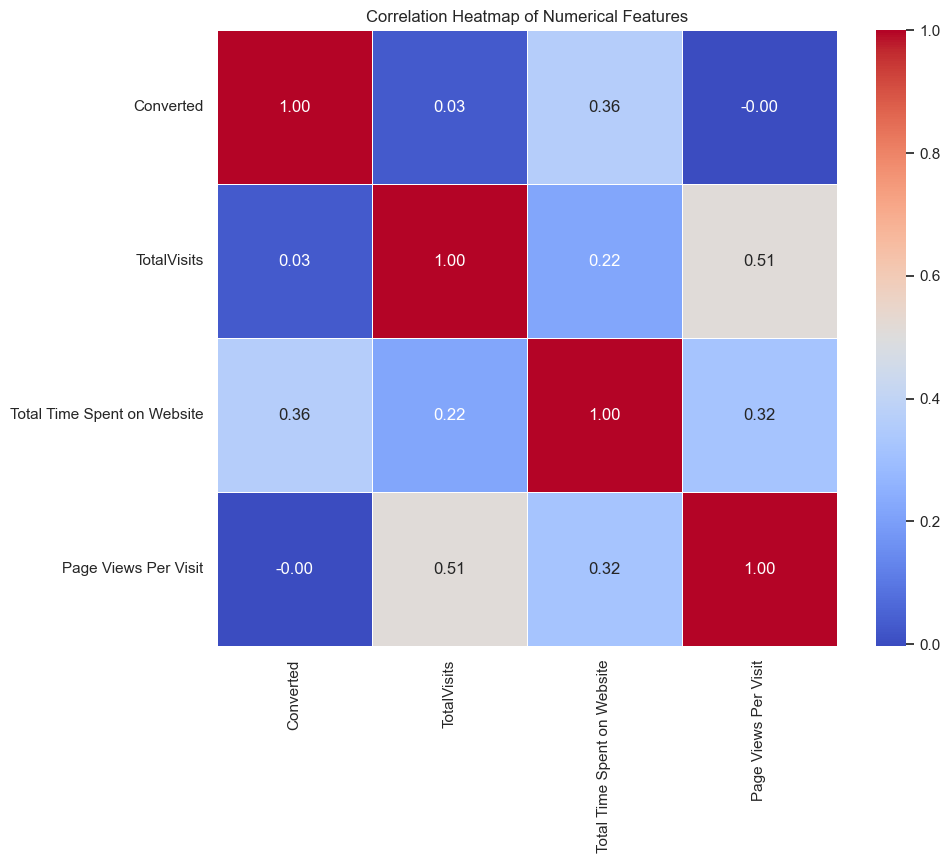

In [9]:
# Correlation matrix of numerical features
valid_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[valid_columns].corr()

# Heatmap visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Observations
- The heatmap shows the correlation between numerical features, indicating that there are no strong correlations between the features.
- This suggests that multicollinearity is not a significant issue in the dataset.
- The 'TotalVisits' and 'Page Views Per Visit' features have a moderate positive correlation, which is expected.
- Additionally, the 'Converted' feature has a moderate positive correlation with 'Total Time Spent on Website', indicating that leads who spend more time on the website are more likely to convert.

# Outlier Analysis and Handling

## Outlier Detection
We will identify outliers using the IQR method for numerical features. Outliers are defined as observations that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

In [10]:
# Calculate IQR for each numerical feature
Q1 = df[valid_columns].quantile(0.25)
Q3 = df[valid_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df[valid_columns] < (Q1 - 1.5 * IQR)) | (df[valid_columns] > (Q3 + 1.5 * IQR)))

## Visualising Outliers
It's important to visualise the outliers to understand their distribution and impact.

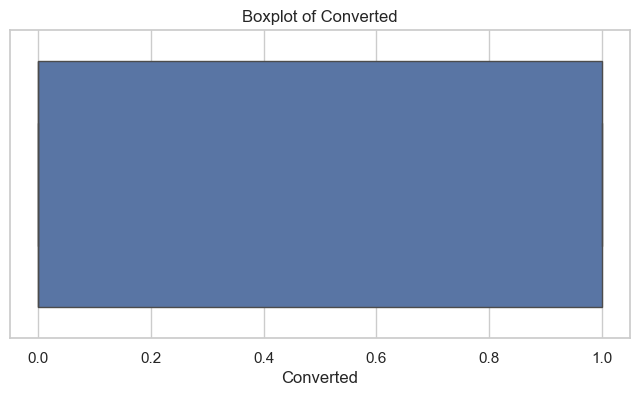

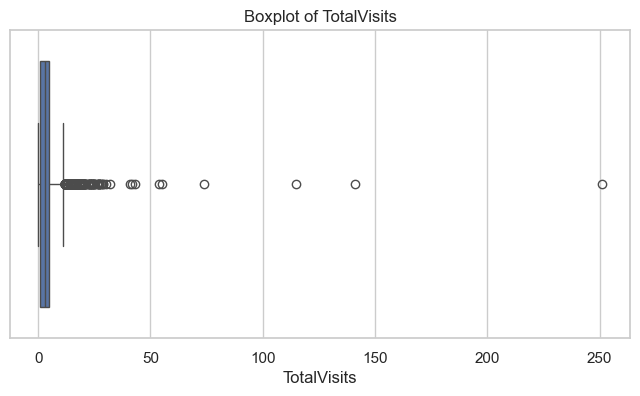

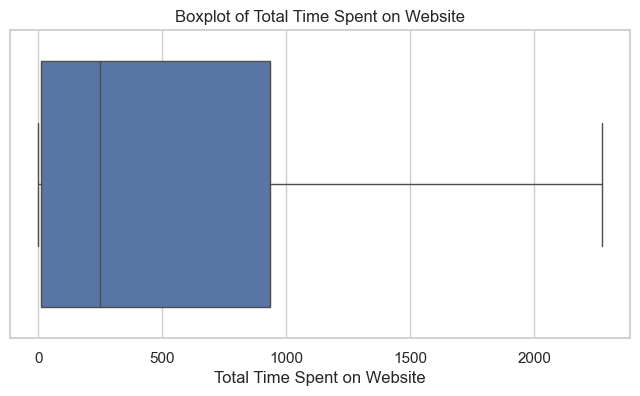

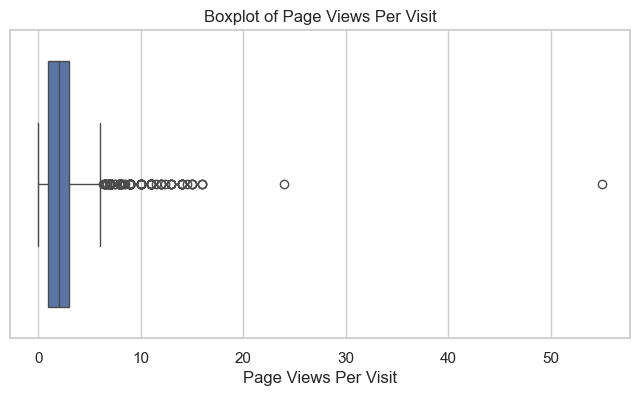

In [11]:
# Plotting boxplots for numerical features to visualise outliers
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

### Observations
- The boxplots show the presence of outliers in the 'TotalVisits' and 'Page Views Per Visit' features.
- These outliers may affect the model's performance and should be handled appropriately.

## Handling Outliers
Based on the visualisation, decide how to handle outliers. Options include capping (using percentiles), transformation (log, square root), or removing them.

In [12]:
# Handling outliers by capping
for feature in numerical_features:
    upper_limit = df[feature].quantile(0.95)
    lower_limit = df[feature].quantile(0.05)
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])

## Final Check for Outliers
Re-visualise the numerical features to ensure outliers have been appropriately treated.

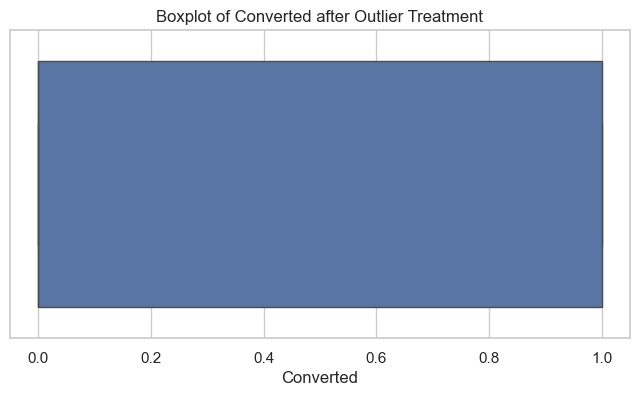

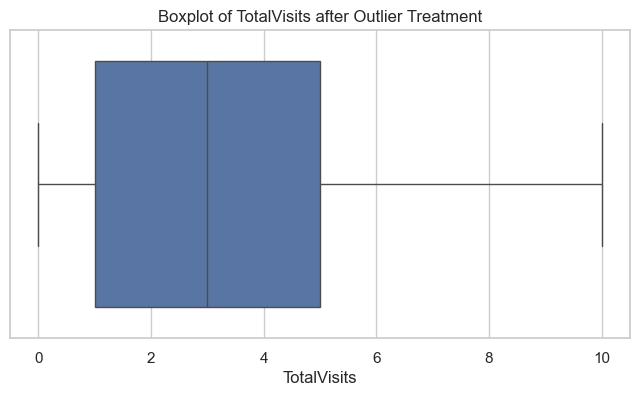

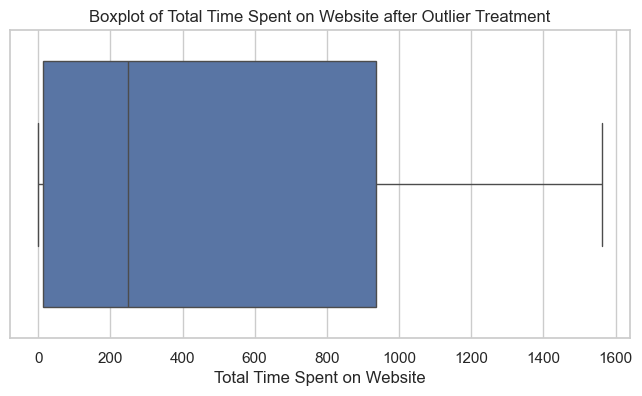

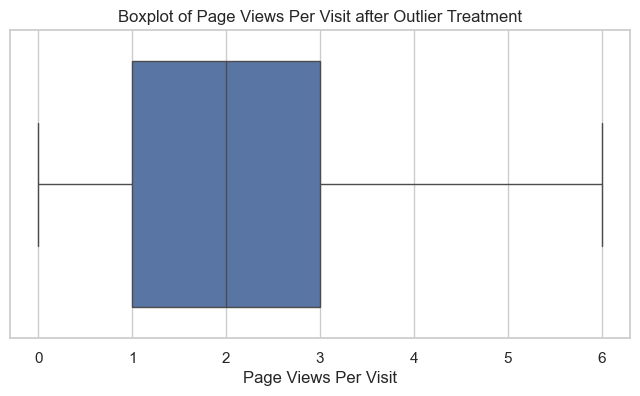

In [13]:
# Re-plotting boxplots for numerical features after capping
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} after Outlier Treatment')
    plt.show()

## Handling Remaining NaN Values

We will assess and impute missing values for both numerical and categorical features as needed.

In [14]:
# Imputing missing values for numerical features with the median
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

# Imputing missing values for categorical features with the mode
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

/var/folders/5d/phgmwl4n4r31tkv77xqrd3_c0000gp/T/ipykernel_38602/2658556166.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/var/folders/5d/phgmwl4n4r31tkv77xqrd3_c0000gp/T/ipykernel_38602/2658556166.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

## Feature Engineering

### Creating Dummy Variables
For logistic regression, we need to convert categorical variables into a format that can be provided to the model. This involves creating dummy variables, which is a common practice to handle categorical data in machine learning.

We will use Pandas' `get_dummies` method to convert categorical variables into dummy/indicator variables. The parameter `drop_first=True` is used to avoid multicollinearity by dropping the first category.

In [15]:
# Creating dummy variables
df = pd.get_dummies(df, drop_first=True)

## Summary of Data Preparation
Finally, we'll display the information of the updated DataFrame to ensure all features are ready for model building.

In [16]:
# Display the information of the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 150 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: bool(146), float64(4)
memory usage: 1.6 MB


In [17]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.0,5.0,674.0,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,2.0,1532.0,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,1.0,305.0,1.0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,1.0,2.0,1428.0,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## Model Building and Evaluation

### Splitting the Data into Training and Testing Sets
To evaluate our model effectively, we need to split our data into a training set and a testing set.

In [18]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = df.drop('Converted', axis=1)
y = df['Converted']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((7392, 149), (1848, 149), (7392,), (1848,))

### Building the Logistic Regression Model
We will build a logistic regression model using the training data.

In [19]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model
model = LogisticRegression(max_iter=300)

# Fitting the model to the training data
model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

### Model Evaluation
We will evaluate the model's performance using accuracy, precision, recall, and the ROC curve.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.84
Precision: 0.84
Recall: 0.75
ROC AUC: 0.83


### Plotting the ROC Curve

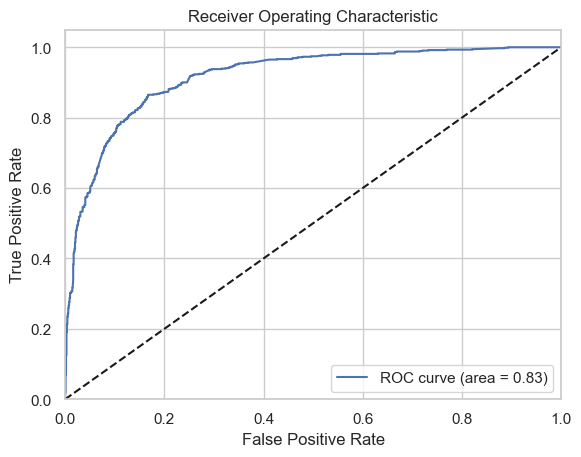

In [21]:
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Observations
- The ROC curve shows that the model has a good performance, with an AUC score of 0.83.
- The model has a high true positive rate and a low false positive rate, indicating that it can effectively predict the conversion of leads.

## Assigning Lead Scores

### Converting Probabilities to Lead Scores
Using the logistic regression model's predicted probabilities, we convert these into a lead score from 0 to 100.

In [22]:
# Calculate predicted probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Converting probabilities to lead scores
lead_scores = (y_probs * 100).astype(int)

# Create a DataFrame with test data indices and corresponding lead scores
lead_score_df = pd.DataFrame({'Lead Score': lead_scores}, index=X_test.index)

# Merge lead scores with the original test data for a comprehensive view
test_data_with_scores = X_test.merge(lead_score_df, left_index=True, right_index=True)

# Display the first few rows of the test data with lead scores
test_data_with_scores.head(20)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Score
4608,8.0,252.0,2.67,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,16
7935,2.0,929.0,2.00,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,5
4043,1.0,2.0,1.00,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,0
7821,2.0,323.0,2.00,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,29
856,3.0,201.0,3.00,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,9
927,3.0,388.0,1.50,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,8
318,5.0,1536.0,5.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,99
1018,7.0,219.0,2.33,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,9
8151,2.0,24.0,2.00,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,20
1570,0.0,0.0,0.00,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,99


In [23]:
# Get the coefficients from the logistic regression model
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_[0]})

# Calculate the absolute values of the coefficients to assess impact regardless of direction (positive/negative)
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

# Sort the features by the absolute value of their coefficients in descending order
sorted_coefficients = coefficients.sort_values("Absolute Coefficient", ascending=False)

# Display the top three features
top_three_features = sorted_coefficients.head(3)
print('Top Three Features: ', top_three_features)

Top Three Features:                                  Feature  Coefficient  Absolute Coefficient
4             Lead Origin_Lead Add Form     2.063342              2.063342
126  Lead Profile_Student of SomeSchool    -1.844155              1.844155
20         Lead Source_Welingak Website     1.516853              1.516853
